<a href="https://colab.research.google.com/github/heyprincehere/ML_Reboot/blob/main/Day_3_Visual_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔥 Day 3: Visual EDA + Feature Engineering (Power-Up Edition)
🧠 Today, you’re not just cleaning or looking — you’re interpreting, storytelling, and crafting new features like a Machine Learning Engineer at Google.

### 🎯 Today’s Goal
Master Visual Exploratory Data Analysis (EDA)

Understand patterns you can’t see in numbers

Begin feature engineering: Create smarter input for better model performance



In [1]:
# ✅ 1. Import Essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url='https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info() #datatype and null value
df.describe() #statistical summary
df.isnull().sum() #null value count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [5]:
# drop unecessary columns
df = df.drop(columns=['Name','Cabin','Ticket'])


# Fill the missing values in age
df['Age'] = df['Age'].fillna(df['Age'].mean())


# Fill the missing Value in Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [6]:
# Conver the object data type of sex and embarked into binary
df['Sex'] = df['Sex'].str.strip().str.lower().map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S':0, 'C':1})


df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,0,35.0,0,0,8.0500,0.0


In [7]:
df.to_csv('titanic_cleaned_data.csv', index = False)


df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,0,35.0,0,0,8.0500,0.0


# EDA

In [8]:
df=pd.read_csv('titanic_cleaned_data.csv')
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,0,35.0,0,0,8.0500,0.0


## ✅ 2. Target Distribution

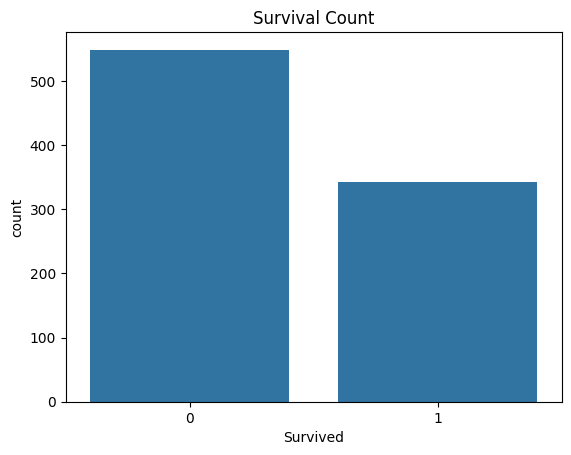

In [10]:
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

# ✅ 3. Survival Rate by Sex & Class

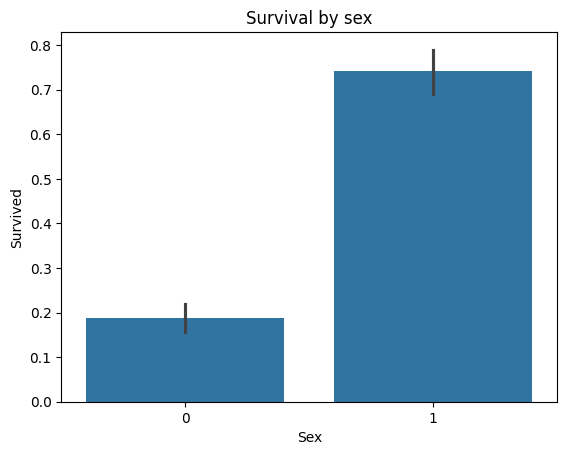

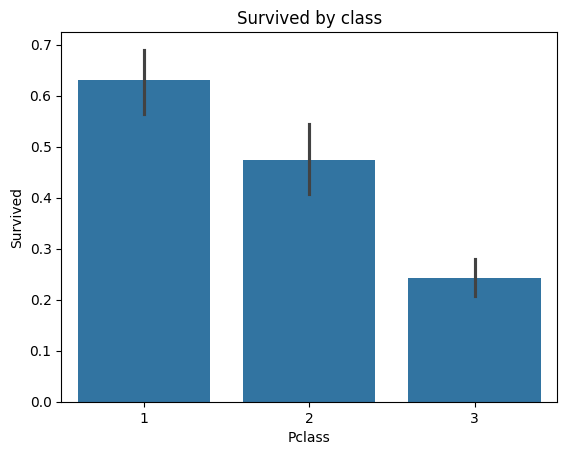

In [11]:
sns.barplot(x='Sex' , y='Survived', data=df)
plt.title('Survival by sex')
plt.show()
sns.barplot(x='Pclass', y='Survived',data=df)
plt.title('Survived by class')
plt.show()

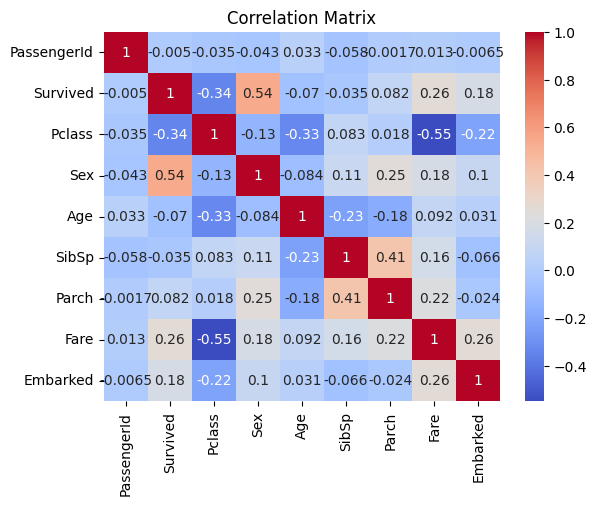

In [12]:
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

# ✅ 5. Boxplot: Age vs. Survival

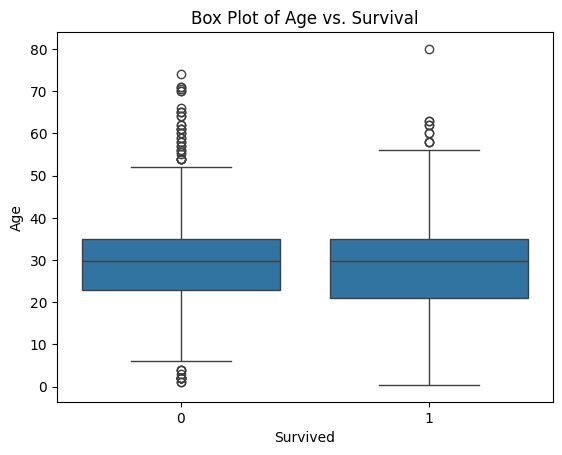

In [13]:
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Box Plot of Age vs. Survival')
plt.show()

# ✅ 6. Feature Engineering: Title Extraction

In [14]:
df_full = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Extract title from Name
df_full['Title'] = df_full['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Simplify rare titles
df_full['Title'] = df_full['Title'].replace(['Lady', 'Countess','Capt','Col', 'Don', 'Dr',
                                             'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df_full['Title'] = df_full['Title'].replace('Mlle', 'Miss')
df_full['Title'] = df_full['Title'].replace('Ms', 'Miss')
df_full['Title'] = df_full['Title'].replace('Mme', 'Mrs')

# Map titles to numbers
df_full['Title'] = df_full['Title'].map({'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5})
df_full['Title'] = df_full['Title'].fillna(0)

# Drop unneeded
df_full = df_full.drop(['Name', 'Cabin', 'Ticket'], axis=1)

df_full.to_csv("titanic_title_feature.csv", index=False)


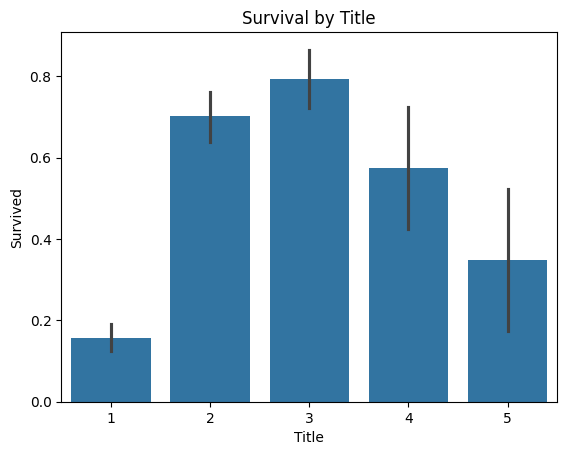

In [15]:
sns.barplot(x='Title', y='Survived', data=df_full)
plt.title('Survival by Title')
plt.show()
